### Questão 1

In [609]:
import numpy as np
tolerancia = 2**(-30)

In [610]:
def g(x, f, intervalo):
    ''' Calcula g(x) tal que g(x) = I[c->d] f(x,y) dy pelo método do trapézio
    
    Parametros
    x : valor de x
    f : função de duas variáveis
    intervalo : array com os valores entre c e d já discretizados
    
    Retornos
    integral : valor de g(x)'''

    integral = 0
    for i in range(len(intervalo)-1):
        integral += (f(x, intervalo[i]) + f(x, intervalo[i+1]))/2 * (intervalo[i+1] - intervalo[i])
        
    return integral

def Trapezio2D (f, a, b, c, d, m, n):
    '''Calcula integral dupla na função f pelo método do trapézio
    
    Parametros
    f : função 
    a : limite inferior da integração em x
    b : limite superior da integração em x
    c : limite inferior da integração em y
    d : limite superior da integração em y
    m : número de discretizações a serem feitas no intervalo a-b
    n : número de discretizações a serem feitas no intervalo c-d
    
    Retornos
    integral_dupla : valor da integral dupla da função nos parâmetros fornecidos'''

    int_a_b = np.linspace(a, b, m+1)
    int_c_d = np.linspace(c, d, n+1)

    integral_dupla = 0

    for i in range(m):
        integral_dupla += (g(int_a_b[i],f, int_c_d) + g(int_a_b[i+1], f, int_c_d))/2 * (int_a_b[i+1] - int_a_b[i])
    
    return integral_dupla


In [611]:
def f(x, y):
    return 4*x + (3*x*x*y)/2 + (y**3)/3

In [612]:
Trapezio2D(f, 1, 2, 3, 4, 300, 300)

32.83334953703704

### Questão 2

In [613]:
def g2(x, f, intervalo):
    ''' Calcula g(x) tal que g(x) = I[c->d] f(x,y) dy pelo método de Simpson
    
    Parametros
    x : valor de x
    f : função de duas variáveis
    intervalo : array com os valores entre c e d já discretizados
    
    Retornos
    integral : valor de g(x)'''

    c = intervalo[0]
    d = intervalo[-1]

    n = (int)((len(intervalo)-1)/2)

    h = (d-c)/(2*n)

    y = f(x, c)

    for i in range(1, n):
        y += 2*f(x, intervalo[2*i])
    
    for i in range(1, n+1):
        y += 4 * f(x, intervalo[2*i-1])

    y += f(x, intervalo[2*n])
    
    return (h*y)/3


def Simpson2D( f, a, b, c, d, m, n):
    '''Calcula integral dupla na função f pelo método de Simpson
    
    Parametros
    f : função 
    a : limite inferior da integração em x
    b : limite superior da integração em x
    c : limite inferior da integração em y
    d : limite superior da integração em y
    m : número de discretizações a serem feitas no intervalo a-b
    n : número de discretizações a serem feitas no intervalo c-d
    
    Retornos
    integral_dupla : valor da integral dupla da função nos parâmetros fornecidos'''
    
    h = (b-a)/(2*n)

    intervalo_a_b = np.linspace(a, b, 2*m+1)
    intervalo_c_d = np.linspace(c, d, 2*n+1)

    y = g2(a, f, intervalo_c_d)

    for i in range(1, m):
        y += 2 * g2(intervalo_a_b[2*i], f, intervalo_c_d)
    
    for i in range(1, m+1):
        y += 4 * g2(intervalo_a_b[2*i-1], f, intervalo_c_d)

    y += g2(b, f, intervalo_c_d)
    
    return (h*y)/3
    

In [614]:
Simpson2D(f, 1, 2, 3, 4, 300, 300)

32.833333333333364

### Questão 3

In [615]:
nos_Gauss = {2:[np.sqrt(3)/3 , -np.sqrt(3)/3] ,
             3: [0,np.sqrt(15)/5, -np.sqrt(15)/5] ,
             4: [(1/35)*np.sqrt(525-70*np.sqrt(30)) , -(1/35)*np.sqrt(525-70*np.sqrt(30)), (1/35)*np.sqrt(525+70*np.sqrt(30)), -(1/35)*np.sqrt(525+70*np.sqrt(30))],
             5: [0 , (1/21)*np.sqrt(245-14*np.sqrt(70)), -(1/21)*np.sqrt(245-14*np.sqrt(70)), (1/21)*np.sqrt(245+14*np.sqrt(70)), -(1/21)*np.sqrt(245+14*np.sqrt(70))]}
pesos_Gauss = {
    2:  [1,1],
    3: [8/9,5/9,5/9],
    4: [(1/36)*(18+np.sqrt(30)),(1/36)*(18+np.sqrt(30)) , (1/36)*(18-np.sqrt(30)), (1/36)*(18-np.sqrt(30))],
    5: [128/225 , (1/900)*(322+13*np.sqrt(70)) , (1/900)*(322+13*np.sqrt(70)) , (1/900)*(322-13*np.sqrt(70)) , (1/900)*(322-13*np.sqrt(70))]
}

In [616]:
def g3 (f, x, c, d, n):
    ''' Calcula g(x) tal que g(x) = I[c->d] f(x,y) dy
        pelo método de Quadratura Gaussiana.
    
    Parametros
    f : função de duas variáveis
    x : valor de x
    c : limite inferior do intervalo de integração
    d : limite superior do intervalo de integração
    n : número de nós
    
    Retornos
    integral : valor de g(x)'''

    integral = 0

    g = lambda x, t : f(x, c+(d-c)/2 * (t+1))

    for k in range(n):
        integral += pesos_Gauss[n][k]*g(x, nos_Gauss[n][k])

    return (d-c)/2 * integral

def Gauss2D(f, a, b, c, d, m, n):
    '''Calcula integral dupla na função f pelo 
    método de Quadratura Gaussiana
    
    Parametros
    f : função 
    a : limite inferior da integração em x
    b : limite superior da integração em x
    c : limite inferior da integração em y
    d : limite superior da integração em y
    m : número de nós no intervalo a-b
    n : número de nós no intervalo c-d
    
    Retornos
    integral_dupla : valor da integral dupla da função nos parâmetros fornecidos'''
    
    integral_dupla = 0

    g = lambda t : g3(f, a+(b-a)/2 * (t+1), c, d, n)

    for k in range(m):
        integral_dupla += pesos_Gauss[m][k]*g(nos_Gauss[m][k])

    return (b-a)/2 * integral_dupla

In [617]:
a = 1
b = 2
c = 3
d = 4

for i in range (2,6):
    print(
        f"Integral por Gaussiana com {i} nós: {Gauss2D(f, a, b, c, d, 5, 5)}"
    )

Integral por Gaussiana com 2 nós: 32.833333333333336
Integral por Gaussiana com 3 nós: 32.833333333333336
Integral por Gaussiana com 4 nós: 32.833333333333336
Integral por Gaussiana com 5 nós: 32.833333333333336


### Questão 4
Nesta questão foi calculado o volume da seguinte maneira:
- Foram criados 1000 triangulos no plano xy e calculado a área desse triangulo. 
- Conhecendo a área, foi realizado o produto da área com o valor de z (z = f(x, y)). O valor de x e y é o baricentro do triangulo no plano xy.

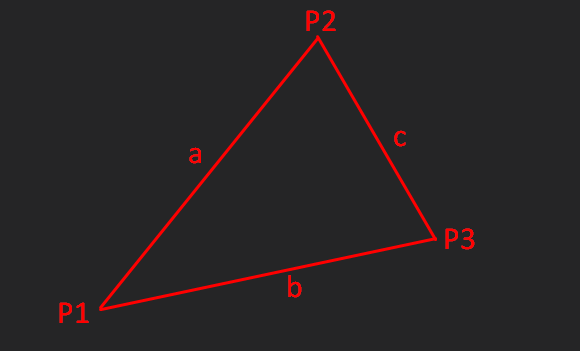

In [618]:
def z_ponto(x, y, P1, P2, P3):
    A = np.array([[P1[0], P1[1], 1], [P2[0], P2[1], 1], [P3[0], P3[1], 1]])
    B = np.array([P1[2], P2[2], P3[2]])

    coef = np.linalg.lstsq(A, B, rcond=None)[0]

    return coef[0] * x + coef[1] * y + coef[2]

def area_triangulo_Heron (a, b, c):
    ''' Cálcula a área do triângulo a partir das três arestas
    
    Parâmetros
    a : double
        primeira aresta do triângulo

    b : double
        segunda aresta do triângulo 

    c : double
        terceira aresta do triângulo
    
    Retornos
    area : double
        area do triângulo'''
    
    p = (abs(a)+abs(b)+abs(c))/2
    return np.sqrt(p*(p-abs(a))*(p-abs(b))*(p-abs(c)))

def diagonais_triangulo (ponto_1, ponto_2, ponto_3):
    ''' Calcula as distâncias a, b e c do triângulo a
        partir de três pontos recebidos
        
    Parâmetros :
    ponto_1 : array-like dimensão 2
        coordenada do primeiro ponto

    ponto_2 : array-like dimensão 2
        coordenada do segundo ponto
            
    ponto_3 : array-like dimensão 2
        coordenada do terceiro ponto
    
    Retornos:
    a : double 
        distância entre ponto 1 e ponto 2 

    b : double 
        distância entre ponto 2 e ponto 3 
        
    c : double 
        distância entre ponto 1 e ponto 3'''
    
    a = np.sqrt((ponto_2[0]-ponto_1[0])**2 + (ponto_2[1]-ponto_1[1])**2)
    b = np.sqrt((ponto_3[0]-ponto_2[0])**2 + (ponto_3[1]-ponto_2[1])**2)
    c = np.sqrt((ponto_3[0]-ponto_1[0])**2 + (ponto_3[1]-ponto_1[1])**2)

    return a, b, c

In [619]:
def integralTriangulo(P1, P2, P3, z1, z2, z3):
    p1 = [P1[0], P1[1], z1]
    p2 = [P2[0], P2[1], z2]
    p3 = [P3[0], P3[1], z3]
    qtdd_delta = 1000

    a, b, c = diagonais_triangulo(P1, P2, P3)

    volume = 0

    if a > b and a > c:     # a maior lado
        intervalo = np.linspace(P1[0],P2[0], qtdd_delta)

        reta = lambda x : (P2[1]-P1[1])/(P2[0]-P1[0]) * (x-P1[0]) + P1[1]

        for i in range(1, qtdd_delta):
            ponto2 = [intervalo[i-1], reta(intervalo[i-1])]
            ponto3 = [intervalo[i], reta(intervalo[i])]
            a1, b1, c1 = diagonais_triangulo(P3, ponto2, ponto3)

            area_triangulo = area_triangulo_Heron(a1, b1, c1)

            x_medio = (P3[0] + ponto2[0] + ponto3[0])/3
            y_medio = (P3[1] + ponto2[1] + ponto3[1])/3

            volume += area_triangulo*z_ponto(x_medio, y_medio, p1, p2, p3)



    elif b > a and b > c:   # b maior lado
        intervalo = np.linspace(P1[0],P2[0], qtdd_delta)

        reta = lambda x : (P3[1]-P1[1])/(P3[0]-P1[0]) * (x-P1[0]) + P1[1]

        for i in range(1, qtdd_delta):
            ponto2 = [intervalo[i-1], reta(intervalo[i-1])]
            ponto3 = [intervalo[i], reta(intervalo[i])]
            a1, b1, c1 = diagonais_triangulo(P2, ponto2, ponto3)

            area_triangulo = area_triangulo_Heron(a1, b1, c1)

            x_medio = (P2[0] + ponto2[0] + ponto3[0])/3
            y_medio = (P2[1] + ponto2[1] + ponto3[1])/3

            volume += area_triangulo*z_ponto(x_medio, y_medio, p1, p2, p3)


            
    else:                   # c maior lado
        intervalo = np.linspace(P2[0],P3[0], qtdd_delta)

        reta = lambda x : (P3[1]-P2[1])/(P3[0]-P2[0]) * (x-P2[0]) + P2[1]

        for i in range(1, qtdd_delta):
            ponto2 = [intervalo[i-1], reta(intervalo[i-1])]
            ponto3 = [intervalo[i], reta(intervalo[i])]
            a1, b1, c1 = diagonais_triangulo(P1, ponto2, ponto3)

            area_triangulo = area_triangulo_Heron(a1, b1, c1)

            x_medio = (P1[0] + ponto2[0] + ponto3[0])/3
            y_medio = (P1[1] + ponto2[1] + ponto3[1])/3

            volume += area_triangulo*z_ponto(x_medio, y_medio, p1, p2, p3)
        
    return volume

Para verificar se está funcionando corretamente, o programa foi testado em uma figura composta por um prisma de base triangular com uma pirâmide de base triangular encima. Os volumes são:
- $V_{prisma} = A_{base} \cdot h = 2 \cdot 5 = 10$ UA 
- $V_{pirâmide} = \frac {A_{base} \cdot h} {3} = \frac {2 \cdot 3} {3} = 2$ UA

Somando as duas temos $12$ UA

In [620]:
P1 = [0, 0]
P2 = [2, 0]
P3 = [1, 2]
z1 = 5
z2 = 5
z3 = 8

print("Volume pelo método de Heron: ", integralTriangulo(P1, P2, P3, z1, z2, z3))

Volume pelo método de Heron:  12.000000000000185
